# PROBLEM STATEMENT

This Dataset consists of salaries for Data Scientists, Machine Learning Engineers, Data Analysts, Data Engineers in various cities across India (2022).

This dataset contains the column:
    
    Company Name
    Job Title
    Salaries Reported
    Location
    Salary

AIM:
    
    To read and understand the dataset,visualize the dataset,to handle missing values,encoding etc

# Import libraries

In [52]:

import numpy as np 
import pandas as pd #for analysis 
import matplotlib.pyplot as plt #for visualization
import seaborn as sns#visualization and eda
%matplotlib inline 
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans

In [53]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [54]:
salary=pd.read_csv("C:\\Users\\kpmuj\\Downloads\\Salary Dataset.csv")

In [55]:
salary

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


# Data cleaning and preparations

In [56]:
#checking the size of dataset
salary.shape

(4344, 5)

There are 4344 rows and 5 columns in the dataset

In [57]:
#printing first five rows
salary.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [58]:
#printing last five rows
salary.tail()

,Company Name,Job Title,Salaries Reported,Location,Salary
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"
4343,vPhrase,Machine Learning Engineer,1.0,Mumbai,"₹9,39,843/yr"


In [59]:
#VIEW THE STATISTICAL SUMMARY OF NUMERICAL VARIABLES
salary.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [60]:
#checking the datatypes of columns in the hr dataset
salary.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
dtype: object

There are one floating type and four object type

In [61]:
#List of all keys
salary.keys

<bound method NDFrame.keys of                    Company Name                             Job Title  \
0                      Mu Sigma                        Data Scientist   
1                           IBM                        Data Scientist   
2     Tata Consultancy Services                        Data Scientist   
3              Impact Analytics                        Data Scientist   
4                     Accenture                        Data Scientist   
...                         ...                                   ...   
4339                    TaiyōAI            Machine Learning Scientist   
4340    Decimal Point Analytics            Machine Learning Developer   
4341                     MyWays            Machine Learning Developer   
4342  Market Pulse Technologies  Software Engineer - Machine Learning   
4343                    vPhrase             Machine Learning Engineer   

      Salaries Reported   Location         Salary  
0                 105.0  Bangalore   ₹6,4

In [62]:
#checking number of unique elements in the dataset
salary.nunique()

Company Name         2529
Job Title              26
Salaries Reported      49
Location                5
Salary               3101
dtype: int64

In [63]:
#random row from the dataset
salary.sample()

,Company Name,Job Title,Salaries Reported,Location,Salary
3377,Tech Data,Data Engineer,1.0,Hyderabad,"₹51,799/mo"


In [64]:
salary.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
1424,DBS Bank,Data Scientist,2.0,Hyderabad,"₹9,95,830/yr"
1883,Swiggy,Data Scientist,1.0,Mumbai,"₹13,55,169/yr"
3355,Alliance Healthcare,Data Engineer,1.0,Hyderabad,"₹25,000/mo"
3116,Mobiotics,Data Engineer,1.0,Bangalore,"₹8,76,076/yr"
3852,Mantra Labs,Machine Learning Engineer,1.0,Bangalore,"₹10,31,658/yr"
1792,eClerx,Data Scientist,3.0,Mumbai,"₹7,33,769/yr"
1485,ValueLabs,Data Scientist,1.0,Hyderabad,"₹25,67,346/yr"
3876,Turing.com,Machine Learning Engineer,1.0,Bangalore,$62/hr
163,GE Aviation,Data Scientist,3.0,Bangalore,"₹13,49,689/yr"
1635,Microsoft,Data Scientist,2.0,New Delhi,"₹87,349/mo"


sample(10) gives the 10 random rows from the dataset

In [65]:
#missing values
salary.isnull()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4339,False,False,False,False,False
4340,False,False,False,False,False
4341,False,False,False,False,False
4342,False,False,False,False,False


In [66]:
#checking the column names
salary.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary'], dtype='object')

In [67]:
#number of missing values
salary.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

there is missing values in the column ,company name and salaries reported

In [68]:
#filling missing values
salary['Company Name'] =salary['Company Name'].fillna(salary['Company Name'].mode()[0])
salary['Salaries Reported'] = salary['Salaries Reported'].fillna(salary['Salaries Reported'].mode()[0])

In [69]:
salary.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

there is no missing values now

In [70]:
#VIEW SUMMARY OF DATASET
#checking the info of dataset
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4344 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4344 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


We see that the salary column is string  , let's convert it

In [71]:
salary['Salary'].str.slice(-2).unique()

array(['yr', 'mo', 'hr'], dtype=object)

In this case , make one unit for all the observations which 'yr'.
and see the salaries that has 'hr', and combine them in one column then converting them into 'yr'.
 do the same for the salaries that has 'mo'.
and combine them in one column.

In [72]:
salary['Salary'] = salary['Salary'].str.slice(1,)


In [73]:
def Seeking_hr(string):
    if 'hr' in string.lower():
        return True
    else:
        return False
    
def Seeking_mo(string):
    if 'mo' in string.lower():
        return True
    else:
        return False
    
def Seeking_yr(string):
    if 'yr' in string.lower():
        return True
    else:
        return False

In [74]:
salary['Salary_hr'] = salary[salary['Salary'].apply(lambda x: Seeking_hr(x))]['Salary'].str.replace('/hr','').str.replace(',','').astype(int)

average_weekly_hours = 20 # Assume the average hours of work weekly is 15-20
salary['Salary_hr'] = salary['Salary_hr'] * 20 * 4 * 12



In [75]:
# Now let's convert mo

salary['Salary_mo'] = salary[salary['Salary'].apply(lambda x: Seeking_mo(x))]['Salary'].str.replace('/mo','').str.replace(',','').astype(int)
salary['Salary_mo'] = salary['Salary_mo'] * 12



In [76]:
# Now let's combine all of them in one column
salary['Salary_yr'] = salary[salary['Salary'].apply(lambda x: Seeking_yr(x))]['Salary'].str.replace('/yr','').str.replace(',','')  

salary.drop(salary[salary['Salary_yr'] == 'FN 156179'].index ,inplace = True) # This the only observation that has 'FN'

In [77]:
# Now  converting the type of the Salary_yr culomn
salary['Salary_yr'] = salary[salary['Salary'].apply(lambda x: Seeking_yr(x))]['Salary'].str.replace('/yr','').str.replace(',','').astype(float) 


In [78]:
#combine them In one column which is the 'Salary_yr'culomn
salary['Salary_yr'].fillna(salary['Salary_mo'],inplace = True)
salary['Salary_yr'].fillna(salary['Salary_hr'], inplace = True)
salary.sort_values(by = ['Salary_yr'], ascending = False).sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary_hr,Salary_mo,Salary_yr
1679,Loginworks,Data Scientist,2.0,New Delhi,"5,27,901/yr",NaN,NaN,527901.0
119,ShieldSquare,Data Scientist,3.0,Bangalore,"7,61,610/yr",NaN,NaN,761610.0
2472,DataBeat,Data Analyst,1.0,Hyderabad,"15,540/mo",NaN,186480.0,186480.0
787,i4u Labs,Data Scientist,1.0,Bangalore,"29,92,992/yr",NaN,NaN,2992992.0
2750,Morningstar,Data Analyst,22.0,Mumbai,"3,64,638/yr",NaN,NaN,364638.0
1899,Edelweiss Financial Services,Data Scientist,1.0,Mumbai,"15,04,836/yr",NaN,NaN,1504836.0
2367,Capgemini,Data Analyst,9.0,Hyderabad,"3,77,686/yr",NaN,NaN,377686.0
602,K & K Technical Group,Data Scientist,1.0,Bangalore,"2,12,940/yr",NaN,NaN,212940.0
4177,Gemini Solutions,Machine Learning Engineer,1.0,New Delhi,"7,56,978/yr",NaN,NaN,756978.0
551,Datalicious,Data Scientist,1.0,Bangalore,"16,21,204/yr",NaN,NaN,1621204.0


In [79]:
#Now let's drop unnecessary columns => (Salary_hr, Salary_mo, Salary )
salary.drop(columns=['Salary_hr','Salary_mo','Salary'],inplace = True)
salary.head()

,Company Name,Job Title,Salaries Reported,Location,Salary_yr
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0
1,IBM,Data Scientist,95.0,Bangalore,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,944110.0


In [80]:
#lets replace the categorical value with a numeric value using label encoder
from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()

In [81]:
salary["Location_label"]=label_encoder.fit_transform(salary["Location"])

In [82]:
salary

,Company Name,Job Title,Salaries Reported,Location,Salary_yr,Location_label
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0,0
1,IBM,Data Scientist,95.0,Bangalore,1191950.0,0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0,0
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0,0
4,Accenture,Data Scientist,32.0,Bangalore,944110.0,0
...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,62160.0,2
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,751286.0,2
4341,MyWays,Machine Learning Developer,1.0,Mumbai,410952.0,2
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,1612324.0,2


In [83]:
salary.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location',
       'Salary_yr', 'Location_label'],
      dtype='object')

In [84]:
#unique values in the job title column
salary['Job Title'].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [85]:
#unique values in the location column
salary["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [86]:
# Verify the First 30 Companies in dataset
salary['Company Name'].value_counts().head(30)

Tata Consultancy Services         44
Amazon                            32
Accenture                         30
Google                            27
IBM                               26
Fresher                           26
First Student                     25
Infosys                           23
DONE by NONE                      21
Cognizant Technology Solutions    21
ABC                               20
Microsoft                         17
Capgemini                         17
Wipro                             17
LTI                               16
Tech Mahindra                     16
Deloitte                          16
Nones                             15
Fractal                           14
Wipro Technologies                14
HCL Technologies                  14
Quantiphi                         14
Genpact                           13
Optum                             12
Freelancer                        11
PwC                               10
ZS Associates                     10
D

In [87]:
#pairwise correlation
salary.corr()

,Salaries Reported,Salary_yr,Location_label
Salaries Reported,1.000000,-0.035505,-0.045632
Salary_yr,-0.035505,1.000000,-0.083899
Location_label,-0.045632,-0.083899,1.000000


corr() function is to find correlation among the columns

<AxesSubplot:>

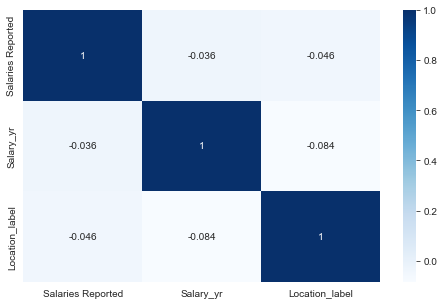

In [88]:
plt.figure(figsize=(8,5))
sns.heatmap(salary.corr(), cbar = True, annot = True, cmap='Blues')

heatmap created to understand the linear relationship between different variables in the salary dataset Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables

# DATA VISUALIZATION

(0.0, 200000.0)

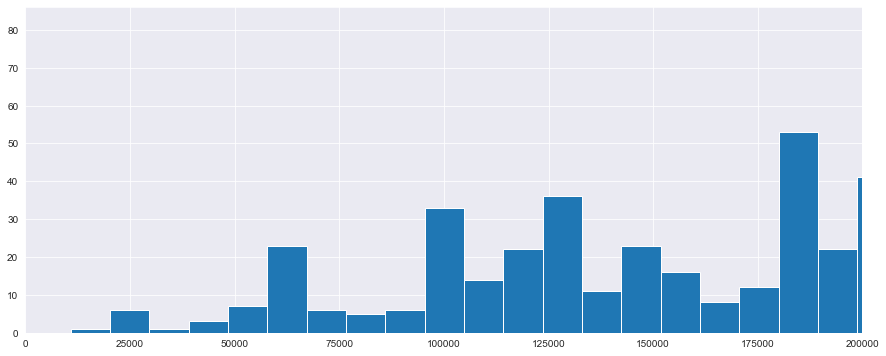

In [89]:
#salary counts
plt.figure(figsize=(15, 6))
plt.hist(x=salary["Salary_yr"], bins=2000)
plt.xlim(0,200000)

In [90]:
#Salary chat with Job position
data = salary.groupby('Job Title')['Salary_yr'].mean().sort_values(ascending=False)
fig = px.bar(data,title="salary with job positions")

fig.show()


from this plot we can see that data science manager is getting high salary yearly,and machine learning scientist is getting low salary yearly

In [91]:
#Top 5 High Paying Companies
x = salary.groupby('Company Name').mean()['Salary_yr'].sort_values(ascending=False).head(5)
fig = px.bar(x, title="Top 5 High Paying Companies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

from this plot we can find that L Brands is the toppest high paying company

In [92]:
#Top 5 Less Paying Companies
x = salary.groupby('Company Name').mean()['Salary_yr'].sort_values(ascending=True).head(5)
fig = px.bar(x, title="Top 5 Less Paying Companies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

from this analysis we can find that Orbit Technologies is the one of the less paying company

In [93]:
#Average salary by location
avg_sal_loc = salary.groupby("Location")['Salary_yr'].agg('mean').reset_index()
fig = px.bar(avg_sal_loc, x="Location", y="Salary_yr", color='Location', title="Average Salary by Location")
fig.update_traces(textfont_size=10, textangle=45, textposition="outside", cliponaxis=False)
fig.show()

bangalore is the location giving highest salary

In [94]:
#Number of jobs by location
sns.set_style('whitegrid')

px.histogram(x=salary["Location"])

bangalore has the highest number of jobs

In [95]:
#Average Salary by Position
avg_sal_tit = salary.groupby("Job Title")['Salary_yr'].agg('mean').reset_index().sort_values('Salary_yr',ascending=False)
fig = px.bar(avg_sal_tit, x="Salary_yr", y="Job Title", orientation='h', title="Average Salary by Position")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

datascience manager has greater than 4M salary

In [96]:
#top 15 companies with higher number of jobs
pos = salary.groupby(['Company Name', 'Location'])['Job Title'].count().sort_values(ascending=False).reset_index().head(15)
fig = px.pie(pos, values='Job Title', labels={'Job Title':'No. of Jobs'}, names='Company Name', hover_data=['Location'], title='Number of Jobs by Company and location')
fig.show()

Tata consultancy service has highest number of jobs

<AxesSubplot:ylabel='Job Title'>

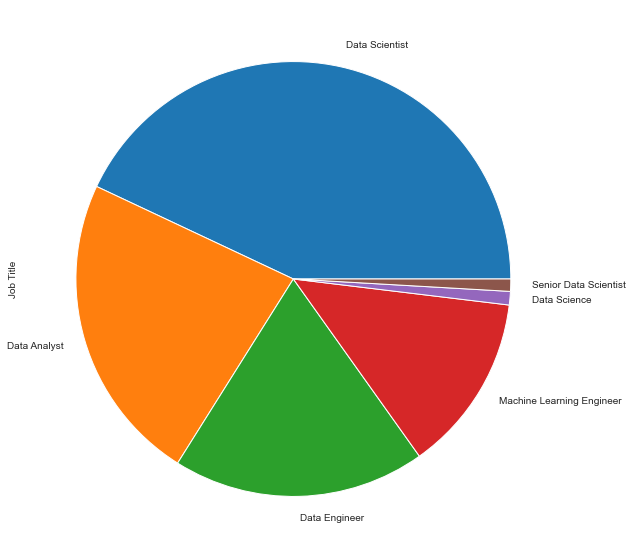

In [97]:
# Plot the distribution of top 6 Jobs using the pie-plot
plt.figure(figsize=(10, 10))
top6jobs = salary['Job Title'].value_counts().sort_values(ascending=False).head(6)
top6jobs.plot(kind='pie')

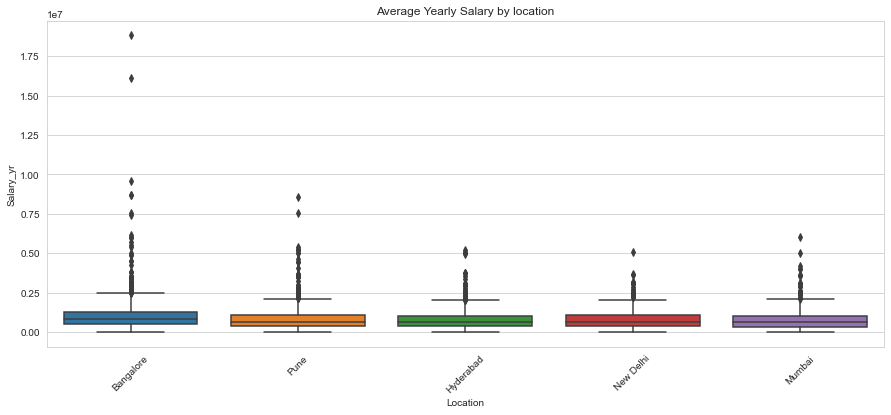

In [98]:
#boxplot of average yearly salary by location
plt.figure(figsize=(15, 6))
sns.boxplot(data=salary, x='Location', y='Salary_yr')
plt.xlabel('Location')
plt.ylabel('Salary_yr')
plt.title('Average Yearly Salary by location')
plt.xticks(rotation='45')
plt.show()

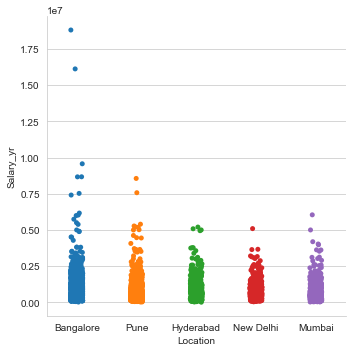

In [99]:
#catplot
sns.catplot(data=salary, x="Location", y="Salary_yr");

In [100]:
#Count the Number of Jobs per Location
def CountLocation(salary):
    
        fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharey=True)
        i=0
        k=0
        numRows = len(salary['Location'].unique())
        for j in salary['Location'].unique(): 
            salary_loc = salary[salary['Location'] == j] 
#             colors = sns.color_palette("hls", 8)
            sns.histplot(ax=axes[i,k], data=salary_loc, x='Job Title', color='g')
            title= "Job Title for Location " + j
            axes[i,k].set_title(title)
            k +=1
            if k == 2:
                i +=1
                k=0  

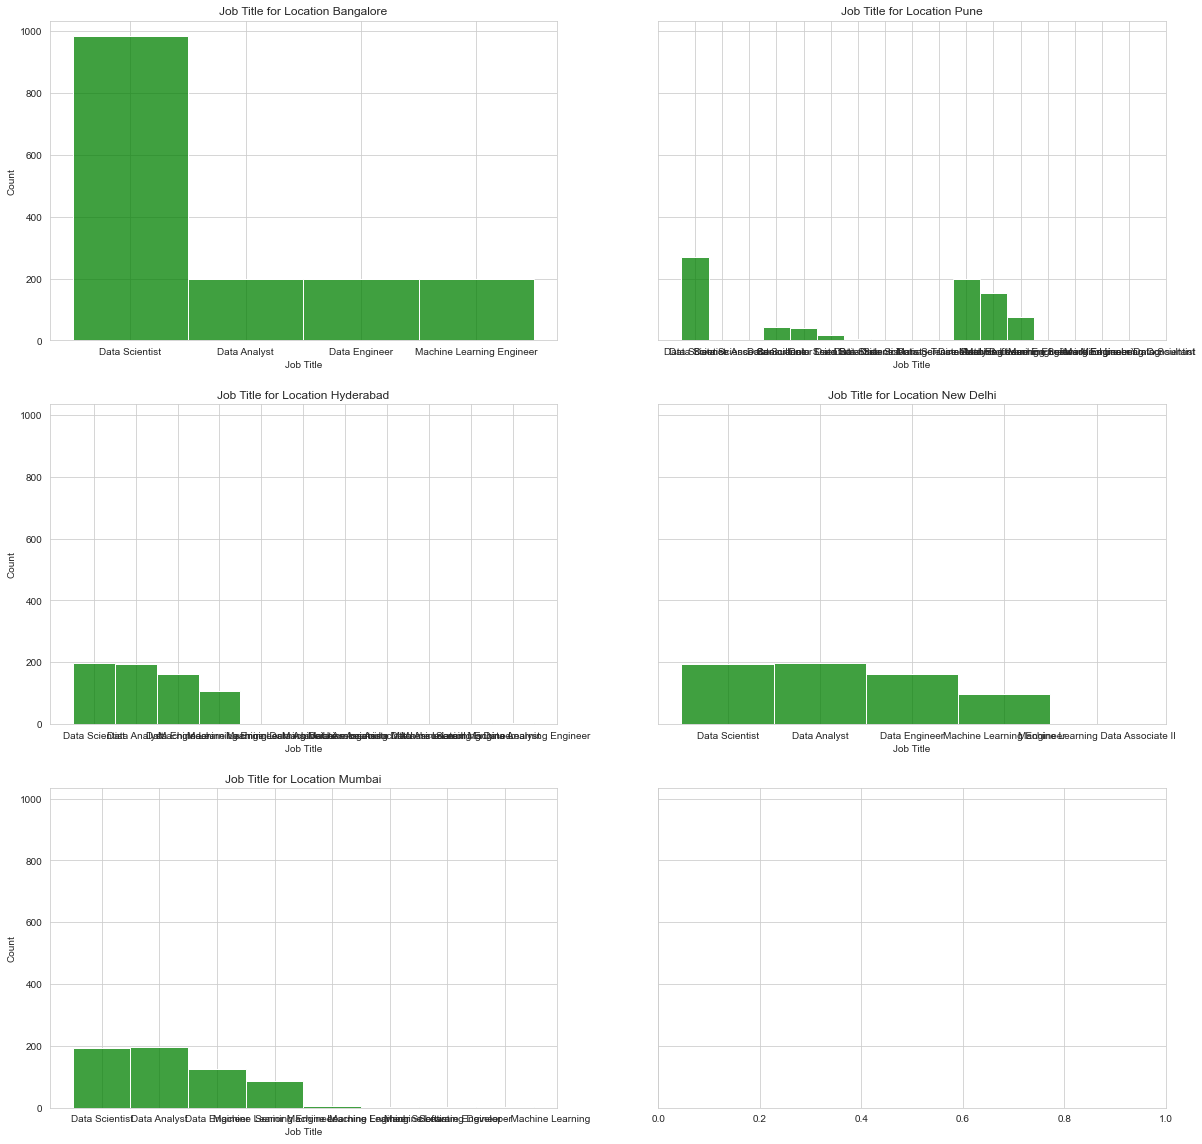

In [101]:
CountLocation(salary)

<AxesSubplot:xlabel='Salary_yr', ylabel='Density'>

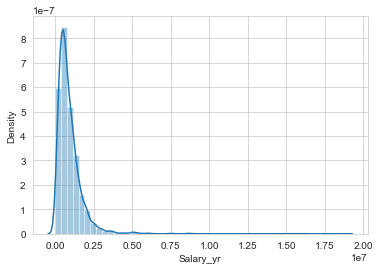

In [102]:
#displot of salary yearly
sns.distplot(salary['Salary_yr'])

# OBSERVATIONS

*We can conclude that Bengalure has the highest salaries because is the capital and the largest city of the Indian state of Karnataka


*Tata offering more jobs in Data Science with compare to other ones


*In General Bangalore offers highest salaries for most roles but Pune for the role of Machine Learning Engineer.

*Bangalore has the highest number of Analytics Jobs followed by Pune.

*The salary of Data Scientist is highest while Data Analyst is among the lowest, though there are lot of outliers in each case.


*Maximum Salary is for the Role of Data Scientist at MiQ in Bangalore 


*Minimum Salary for the Role of Data Analyst at Orbit Technologies at Hyderabad at ₹10814/yr.